<a href="https://colab.research.google.com/github/SaniTheWay/Pandas_IoT_BigData/blob/main/Sanidhya_IoT_A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
##***Sanidhya Dave***

---
```
B.Tech(CSE)
SEM - 4
```



In [106]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium
print("Libraries Imported.")

Libraries Imported.


##Uploading .csv file 
using google.colab lib

In [107]:
from google.colab import files
uploaded = files.upload()
print("Uploaded File.")

Uploaded File.


In [108]:
amazon = pd.read_csv('amazon.csv', delimiter = ',', encoding = 'ISO-8859-1')

##**Ananysing DataSet**  
using .info() and .describe() of **pd**

**1.**Check the dataset for the information and description.
Dataset description:

*   Column 1- ‘year’ : Year when forest fires happened
*   Column 2- ‘state’ : Brazilian State
*Column 3- ‘month’ : Month when forest fires happened
*Column 4- ‘number’ : Number of forest fires reported
*Column 5- ‘date’ : Date when forest fires were reported

In [109]:
print("Describing the Dataframe")

amazon.info()

amazon.describe(include='all')

Describing the Dataframe
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    6454 non-null   int64  
 1   state   6454 non-null   object 
 2   month   6454 non-null   object 
 3   number  6454 non-null   float64
 4   date    6454 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 252.2+ KB


,year,state,month,number,date
count,6454.000000,6454,6454,6454.000000,6454
unique,NaN,23,12,NaN,20
top,NaN,Rio,Janeiro,NaN,2012-01-01
freq,NaN,717,541,NaN,324
mean,2007.461729,NaN,NaN,108.293163,NaN
std,5.746654,NaN,NaN,190.812242,NaN
min,1998.000000,NaN,NaN,0.000000,NaN
25%,2002.000000,NaN,NaN,3.000000,NaN
50%,2007.000000,NaN,NaN,24.000000,NaN
75%,2012.000000,NaN,NaN,113.000000,NaN


**2.** Use basic functions to analyse the sample data:

* Check the minimum value of 'year' column.
* Check the minimum and maximum value of ‘number’ column
* Check the minimum and maximum value of ‘date’ column

In [110]:
# To find min & max value of 'year' column
y_mn=amazon['year'].min()
y_mx=amazon['year'].max()
# To find min & max value of 'number' column
n_mn=amazon['number'].min()
n_mx=amazon['number'].max()
# To find min & max value of 'date' column
d_mn=amazon['date'].min()
d_mx=amazon['date'].max()
#Creating DataFrame:
datas={'MAX':[y_mx,n_mx,d_mx], 'MIN':[y_mn,n_mn,d_mn]}
print(pd.DataFrame(datas,index=['year','number','date']))

               MAX         MIN
year          2017        1998
number         998           0
date    2017-01-01  1998-01-01



--- 
---
**3.** Data Cleaning Process:
Cleaning up data is the first and most important step, as it ensures the quality of the
data is met to prepare data for visualisation. From the given dataset in the ‘number’
column(number of forest fires reported) which is of float type has values in decimal
point such as 18.566, 14.59, 11.068, this values need to be rounded by cleaning up
this data using round function and store the data back to dataset.


In [111]:
# cleaning=pd.DataFrame(amazon['number'],columns='number')
df=pd.DataFrame(round(amazon['number']))
#Making a dataframe and assigning it to the actual one
amazon['number']=df
amazon['number'].describe()

count    6454.000000
mean      108.288193
std       190.815059
min         0.000000
25%         3.000000
50%        24.000000
75%       113.000000
max       998.000000
Name: number, dtype: float64


---

**4.** Boolean indexing:-

Use boolean indexing to get ‘Acre’ state subset and assign it to variable called
‘amazon_acre’ and index the entire dataset and assign it to variable called
‘amazon_acre_data’ and display only ‘number’ column from given dataset. Also use
groupby() method on ‘year’ column and get total number of fires for each year.

In [112]:
#Assigning True values to 'amazon_acre_data' from 'amazon_acre' dataset after Boolean indexing
amazon_acre=amazon['state'] == 'Acre'
amazon_acre_data=amazon[amazon_acre]
#displaying only 'number' Column
amazon_acre_data_num = amazon_acre_data['number']
amazon_acre_data_num

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
234    1.0
235    3.0
236    6.0
237    8.0
238    6.0
Name: number, Length: 239, dtype: float64

In [113]:
amazon_acre_data_yr = amazon[amazon_acre].groupby('year').sum()
print(amazon_acre_data_yr)
print("______________")
print("Total=",amazon_acre_data_yr['number'].sum())

      number
year        
1998   730.0
1999   333.0
2000   434.0
2001   828.0
2002  1544.0
2003   947.0
2004  1184.0
2005   984.0
2006  1221.0
2007  1213.0
2008  1144.0
2009   831.0
2010   476.0
2011   709.0
2012  1186.0
2013  1108.0
2014   557.0
2015  1191.0
2016  1225.0
2017   618.0
______________
Total= 18463.0


---
**5.** Visualise dataset using matplotlib and seaborn(barplot)
```
importing seaborn for ploting graph
```


In [114]:
import seaborn as sns
print("Imported.")

Imported.


Visualise dataset using matplotlib and seaborn(barplot).
Fig.1.0


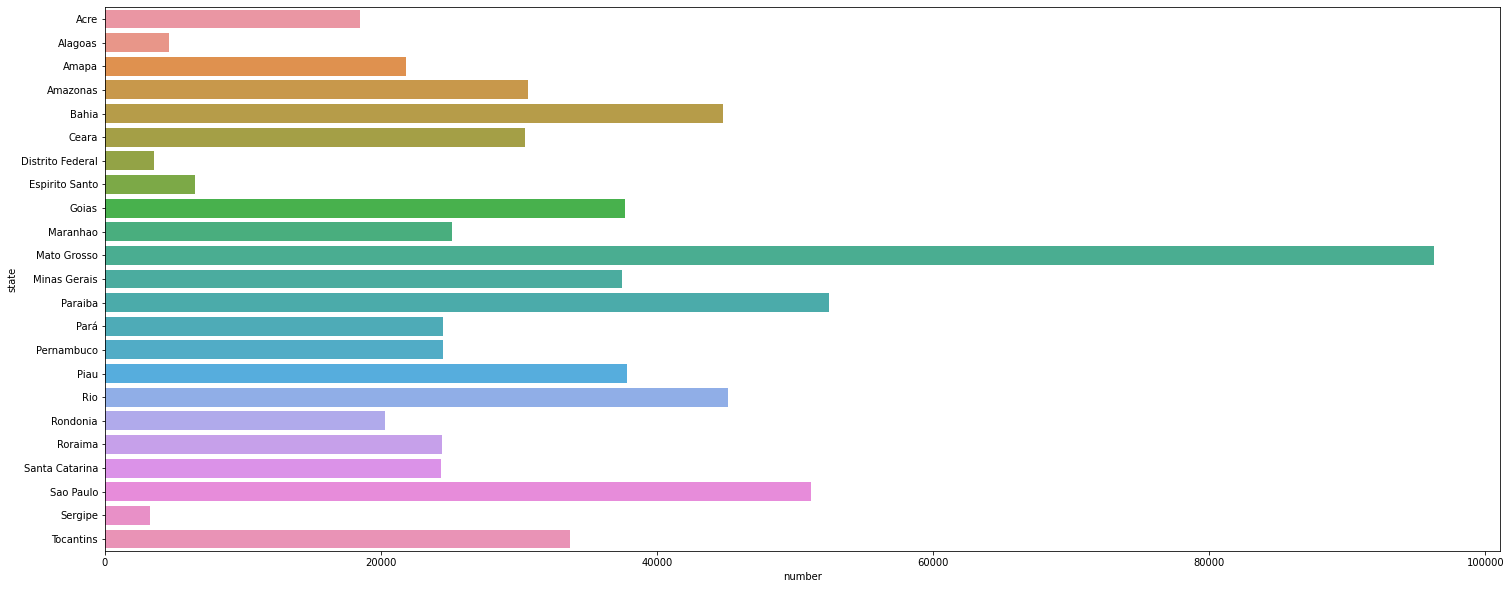

In [115]:
fig = plt.figure(figsize=(25,10))
total_fires = amazon.groupby('state')['number'].sum().reset_index()
sns.barplot(x='number',y='state', data=total_fires)
print("Visualise dataset using matplotlib and seaborn(barplot).\nFig.1.0")